Reference: https://www.geeksforgeeks.org/radix-sort/

In [259]:
def generate_increasing_sequence(n):
    return [i for i in range(n)]

def generate_decreasing_sequence(n):
    return [i-1 for i in range(n,0, -1)]

def generate_increasing_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_increasing_sequence(size))
    return lst

def generate_decreasing_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_decreasing_sequence(size))
    return lst


In [260]:
#This will be used for non best case experiment
import numpy as np
def generate_random_sequence(size=100):
    return np.random.randint(low=1, high=100000, size=size).tolist()
def generate_random_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_random_sequence(size))
    return lst
generate_random_sequences([5, 10, 15])

[[13232, 86709, 83245, 58937, 82647],
 [95490, 20755, 75904, 32300, 44149, 78348, 11888, 6205, 8875, 82283],
 [19233,
  95842,
  45970,
  98717,
  81332,
  82343,
  93386,
  34558,
  45975,
  32160,
  57424,
  15303,
  84448,
  98604,
  77112]]

In [261]:
def mergeRuns(A, left, mid, right, B):
    mid -= 1
    i, j = mid + 1, mid
    while i > left:
        B[i - 1] = A[i - 1]
        i -= 1
    while j < right:
        B[right + mid - j] = A[j + 1]
        j += 1
    for k in range(left, right + 1):
        if B[j] < B[i]:
            A[k] = B[j]
            j -= 1
        else:
            A[k] = B[i]
            i += 1

In [262]:
def extendIncreasingRunLeft(A, i, left):
  while i > left and A[i - 1] <= A[i]:
    i -= 1
  return i

def extendIncreasingRunRight(A, i, right):
  while i < right and A[i] <= A[i + 1]:
    i += 1
  return i

def extendDecreasingRunLeft(A, i, left):
  while i > left and A[i - 1] > A[i]:
    i -= 1
  return i

def extendStrictlyDecreasingRunRight(A, i, right):
  while i < right and A[i] > A[i + 1]:
    i += 1
  return i

def reverseRange(A, i, j):
  while i < j:
    tmp = A[i]
    A[i] = A[j]
    A[j] = tmp
    i += 1
    j -= 1

In [263]:
def peeksort(A, left, right, leftRunEnd, rightRunStart, B):
  if leftRunEnd == right or rightRunStart == left:
    return
  mid = left + ((right - left) >> 1)
  if mid <= leftRunEnd: # |XXXXXXXX|XX X|
    peeksort(A, leftRunEnd + 1, right, leftRunEnd + 1, rightRunStart, B)
    mergeRuns(A, left, leftRunEnd + 1, right, B)
  elif mid >= rightRunStart: # |XX X|XXXXXXXX|
    peeksort(A, left, rightRunStart - 1, leftRunEnd, rightRunStart - 1, B)
    mergeRuns(A, left, rightRunStart, right, B)
  else: # find middle run
    i, j = 0, 0
    if A[mid] <= A[mid + 1]:
      i = extendIncreasingRunLeft(A, mid, leftRunEnd + 1)
      j = mid if mid + 1 == rightRunStart else extendIncreasingRunRight(A, mid + 1, rightRunStart - 1)
    else:
      i = extendDecreasingRunLeft(A, mid, leftRunEnd + 1)
      j = mid if mid + 1 == rightRunStart else extendStrictlyDecreasingRunRight(A, mid + 1, rightRunStart - 1)
      reverseRange(A, i, j)
    if i == left and j == right:
      return
    if mid - i < j - mid: # |XX x|xxxx X|
      peeksort(A, left, i - 1, leftRunEnd, i - 1, B)
      peeksort(A, i, right, j, rightRunStart, B)
      mergeRuns(A, left, i, right, B)
    else: # |XX xxx|x X|
      peeksort(A, left, j, leftRunEnd, i, B)
      peeksort(A, j + 1, right, j + 1, rightRunStart, B)
      mergeRuns(A, left, j + 1, right, B)

In [264]:
def countingSort(arr, exp1):

    n = len(arr)

    # The output array elements that will have sorted arr
    output = [0] * (n)

    # initialize count array as 0
    count = [0] * (10)

    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

In [265]:
def radixSort(arr, d):
    for i in range(d):
        countingSort(arr, 10 ** i)

In [266]:
def isSorted(arr, n):
    for i in range(1, n):
        if arr[i] < arr[i - 1]:
            return False
    return True

In [267]:
import time
def get_time_peeks_sort(lst):
    start = time.time()
    res = peeksort(lst, 0, len(lst) - 1, 0, len(lst) - 1, [0] * len(lst))
    end = time.time()
    duration = (end - start) * 1000
    print(isSorted(lst, len(lst)))
    return duration

def get_time_radix_sort(lst):
    start = time.time()
    res = radixSort(lst, len(str(max(lst))))
    end = time.time()
    duration = (end - start) * 1000
    print(isSorted(lst, len(lst)))
    return duration

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
size_lst = [1000, 10000, 100000]
psort_rand_time = []
psort_inc_time = []
psort_dec_time = []
rsort_rand_time = []
rsort_inc_time = []
rsort_dec_time = []
rand_lst = generate_random_sequences(size_lst)
inc_lst = generate_increasing_sequences(size_lst)
dec_lst = generate_decreasing_sequences(size_lst)

#count timer for peeks sort
for i in range(len(size_lst)):
    psort_rand_time.append(get_time_peeks_sort(rand_lst[i]))
    psort_inc_time.append(get_time_peeks_sort(inc_lst[i]))
    psort_dec_time.append(get_time_peeks_sort(dec_lst[i]))
    
#count timer for radix sort
for i in range(len(size_lst)):
    rsort_rand_time.append(get_time_radix_sort(rand_lst[i]))
    rsort_inc_time.append(get_time_radix_sort(inc_lst[i]))
    rsort_dec_time.append(get_time_radix_sort(dec_lst[i]))

True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True


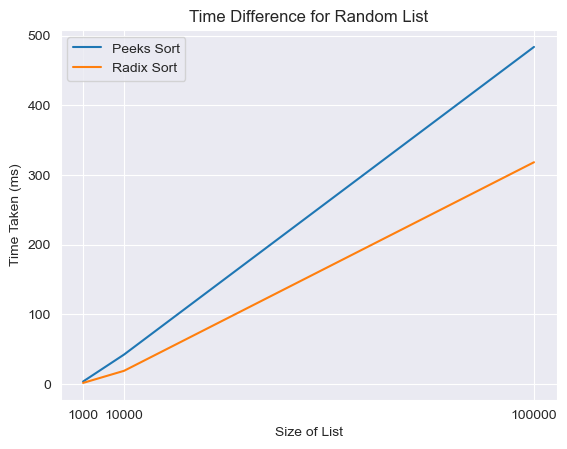

In [269]:
# plot the time difference when x is the size of the list and y is the time taken in ms and compare peeksort and radix sort, just show the size list 1000, 10000, 100000
plt.xticks(size_lst)
plt.plot(size_lst, psort_rand_time, label="Peeks Sort")
plt.plot(size_lst, rsort_rand_time, label="Radix Sort")
plt.xlabel("Size of List")
plt.ylabel("Time Taken (ms)")
plt.title("Time Difference for Random List")
plt.legend()
plt.show()

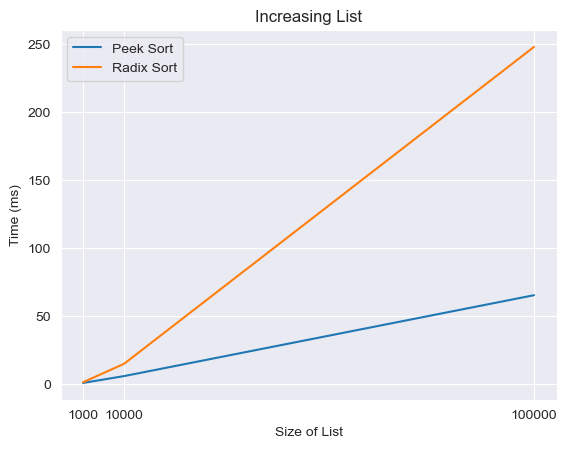

In [270]:
plt.xticks(size_lst)
plt.plot(size_lst, psort_inc_time, label="Peek Sort")
plt.plot(size_lst, rsort_inc_time, label="Radix Sort")
plt.xlabel("Size of List")
plt.ylabel("Time (ms)")
plt.title("Increasing List")
plt.legend()
plt.show()

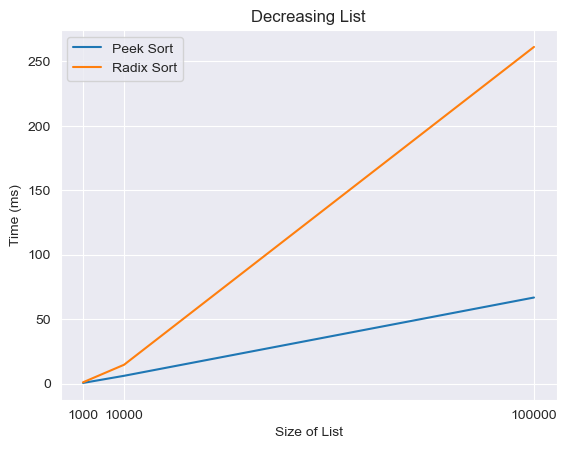

In [271]:
plt.xticks(size_lst)
plt.plot(size_lst, psort_dec_time, label="Peek Sort")
plt.plot(size_lst, rsort_dec_time, label="Radix Sort")
plt.xlabel("Size of List")
plt.ylabel("Time (ms)")
plt.title("Decreasing List")
plt.legend()
plt.show()